# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename, header = 0)

df.head(10)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the world happiness data or the WHRD 2018 data set
2. I will be predicting life expectancy, the label will be Healthy life expectancy at birth which I later rename to be Life expectancy.
3. This is a supervised learning problem and it is a regression problem because I am predicting life expectancy (a continuous value) and my models are learning from labeled data. Since my problem is a regression problem, it is not either a binary classification nor a multi-class classification unless I change my problem type
4. My features as of now are country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'.
   I will later bring these down as I analyze relevance and correlation.
5. This is an important problem because it helps companies decide on where to launch products and can give a preliminary view of what countries to focus on. If a company is creating a product that is geared towards an older population, this model will be able to predict the life expectancy of countries and what countries will be beneficial to keep an eye out for. This would be helpful for products that may take years to build and perfect. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

1. I decided to remove outliers because using the mean would not provide substantial information in this case since each country has different numbers for each feature. I renamed features because some were too long and confusing. I originally grouped the entries by the country because tehre were multiple entries per country for each year. Combining them lowered the training and tetsing data and also led to lower R2 and similar MSE so I left it out to provide the models with more training data. I promoted fair AI by having a avriety of countries present and multiple years present to help account for political imbalances.
2. I would like to use a linear regression model and a neural network. I chose these because my problem is a supervised regression model which limits some of the models I can pick. I also wanted to see how a neural network would compare in this situation because we preciously have worked with different datasets (airbnb data set) and differnt label data types (bool). I had to scale my data for model preperation.
3. I will evalutae my model performance through MSE (mean squared error), MAE (mean absolute error), and the R2 score. I also will evaluate my model using the parameter grid search to find the best parameter.

In [3]:
print(df.shape)
print(df.columns)

(1562, 19)
Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')


In [4]:
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [5]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


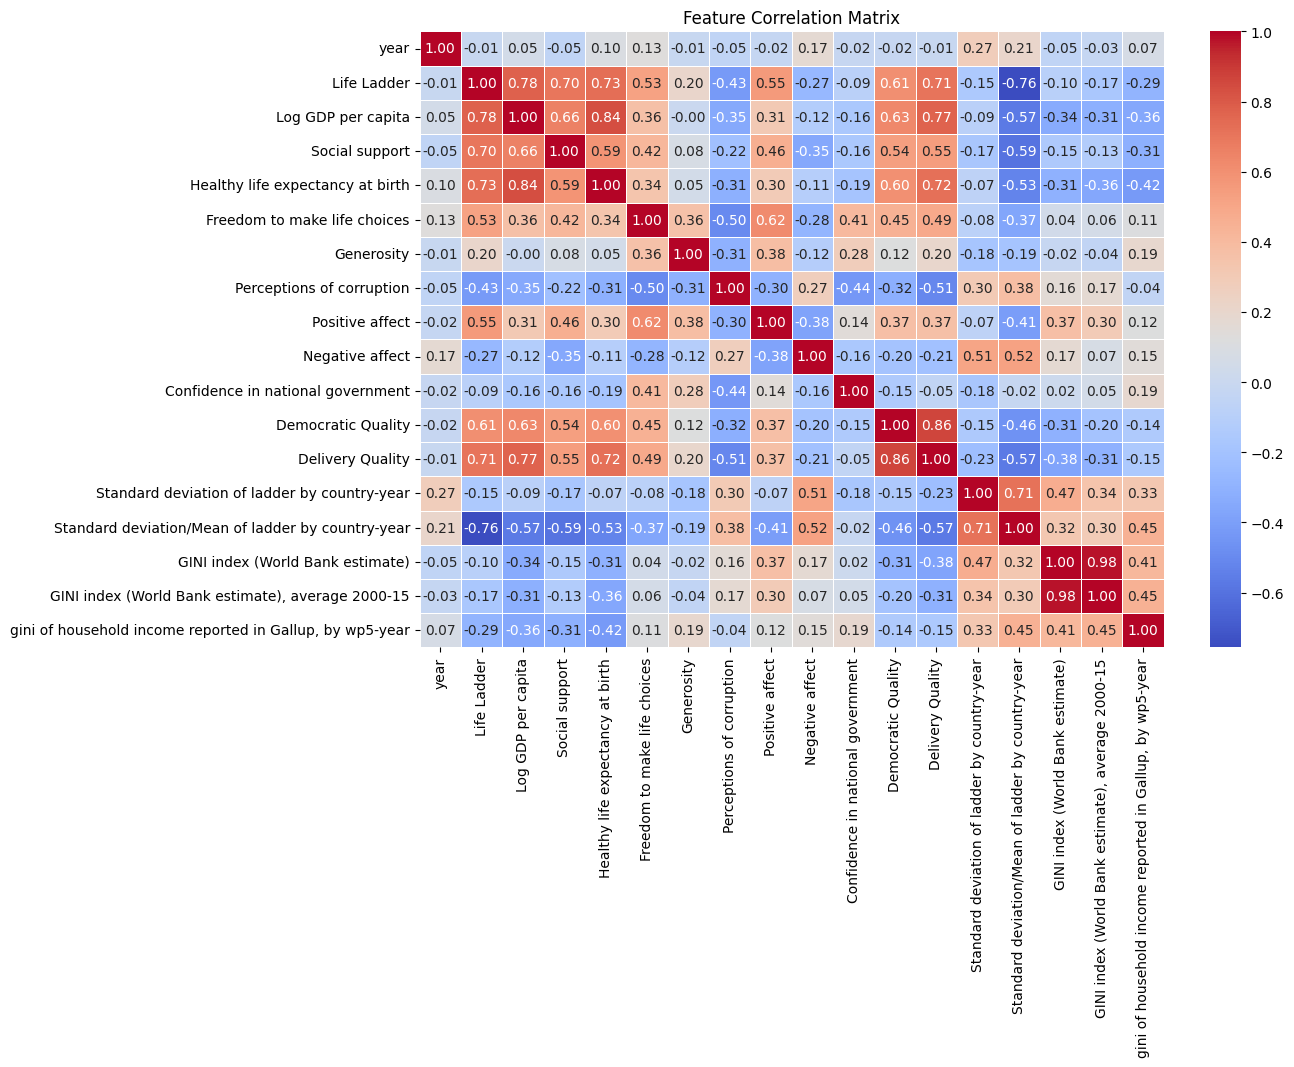

In [6]:
numeric_df = df.select_dtypes(include=['number']) 
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [7]:
features = ['country', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']
df = df[features]
df.columns
new_names_dict = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life expectancy', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption'}

df.rename(new_names_dict, axis = 1, inplace = True)
df.columns

Index(['country', 'year', 'Happiness', 'Positive affect', 'Negative affect',
       'LogGDP', 'Support', 'Life expectancy', 'Freedom', 'Generosity',
       'Corruption'],
      dtype='object')

In [8]:
null_values = df.isnull().sum()
print(null_values)

country             0
year                0
Happiness           0
Positive affect    18
Negative affect    12
LogGDP             27
Support            13
Life expectancy     9
Freedom            29
Generosity         80
Corruption         90
dtype: int64


In [9]:
df = df.dropna()
null_values = df.isnull().sum()
print(null_values)

country            0
year               0
Happiness          0
Positive affect    0
Negative affect    0
LogGDP             0
Support            0
Life expectancy    0
Freedom            0
Generosity         0
Corruption         0
dtype: int64


In [10]:
#df = df.groupby(['country']).mean().reset_index()

In [11]:
df.head()

,country,year,Happiness,Positive affect,Negative affect,LogGDP,Support,Life expectancy,Freedom,Generosity,Corruption
0,Afghanistan,2008,3.723590,0.517637,0.258195,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686
1,Afghanistan,2009,4.401778,0.583926,0.237092,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035
2,Afghanistan,2010,4.758381,0.618265,0.275324,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766
3,Afghanistan,2011,3.831719,0.611387,0.267175,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109
4,Afghanistan,2012,3.782938,0.710385,0.267919,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620


In [12]:
df.shape

(1390, 11)

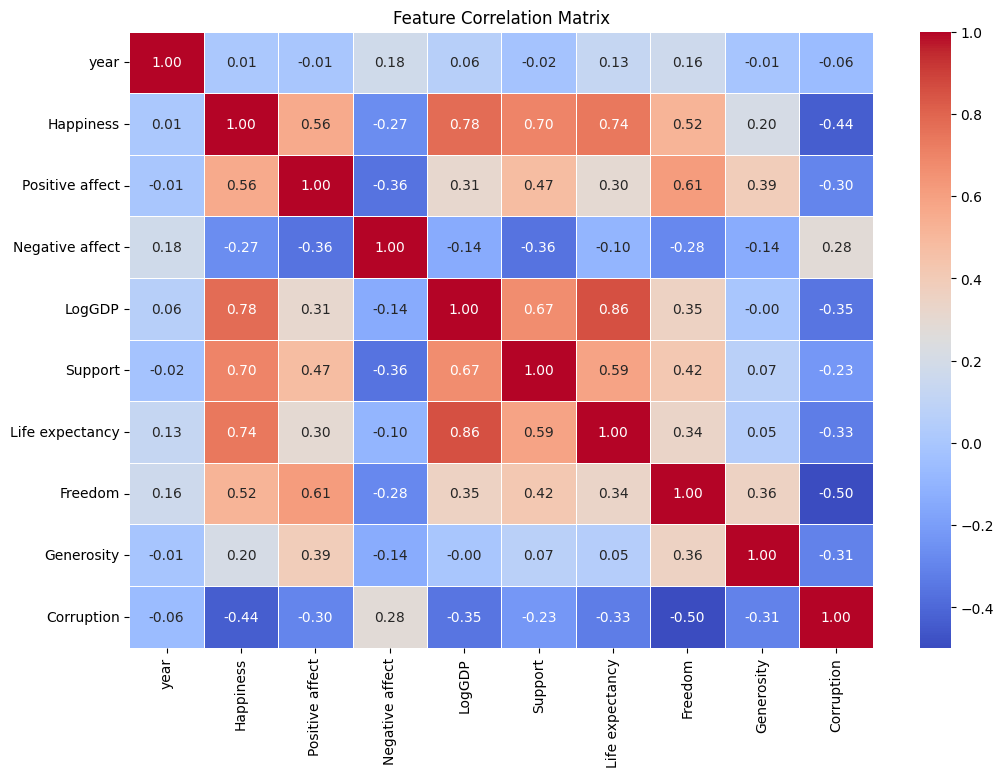

In [13]:
numeric_df = df.select_dtypes(include=['number']) 
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [14]:
df = df.drop(columns = 'year', axis = 1)
df.columns

Index(['country', 'Happiness', 'Positive affect', 'Negative affect', 'LogGDP',
       'Support', 'Life expectancy', 'Freedom', 'Generosity', 'Corruption'],
      dtype='object')

In [15]:
df_noName = df.drop(columns = 'country')
df_noName.columns

Index(['Happiness', 'Positive affect', 'Negative affect', 'LogGDP', 'Support',
       'Life expectancy', 'Freedom', 'Generosity', 'Corruption'],
      dtype='object')

In [16]:
scaler = StandardScaler()
df_to_scale = df.select_dtypes(include=['number'])
transformed_data = scaler.fit_transform(df_to_scale)

df_scaled = pd.DataFrame(
    transformed_data,
    columns=df_to_scale.columns,
    index=df_to_scale.index
)


df_scaled

,Happiness,Positive affect,Negative affect,LogGDP,Support,Life expectancy,Freedom,Generosity,Corruption
0,-1.482217,-1.750523,-0.061768,-1.688765,-2.964907,-1.576468,-0.040976,1.101072,0.672949
1,-0.883179,-1.138975,-0.321899,-1.549098,-2.122280,-1.525515,-0.308069,1.234130,0.502435
2,-0.568195,-0.822171,0.149368,-1.504399,-2.231982,-1.478276,-0.844525,0.831296,-0.269403
3,-1.386707,-0.885626,0.048916,-1.480383,-2.380963,-1.434254,-1.554353,1.061449,-0.138262
4,-1.429796,0.027680,0.058093,-1.394004,-2.384833,-1.392244,-1.315757,1.499971,0.101534
...,...,...,...,...,...,...,...,...,...
1557,-0.628429,0.041525,-0.997459,-1.353375,-0.074985,-1.608399,-1.009631,-0.477287,0.399543
1558,-1.075142,0.164484,-0.297020,-1.355406,-0.352154,-1.473082,-0.559121,-0.289063,0.341794
1559,-1.500235,0.070985,-1.039699,-1.361075,-0.601168,-1.365661,-0.387773,-0.586377,0.289215
1560,-1.471785,0.279088,-0.673672,-1.375645,-0.330713,-1.258240,0.060209,-0.407491,-0.178648


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. I have a new feature lists because some had low correlations or were just unnecessary such as year and country name. I chose to keep these features: Happiness', 'Positive affect', 'Negative affect',
       'LogGDP', 'Support', 'Life expectancy', 'Freedom', 'Generosity',
       'Corruption'
2. I did all my data preperation in the last part where I scaled my data, droped null values, changed feature names, and tested out grouping my data.
3. My models are a linear Regression model and a Neural Network
4. My plan is to train my linear regression model, analyze its MSE and R2. Then I will run a prameter grid with different hyperparameters and find the best R2 from that grid. I will then compare my base model with the best parameter grid one to find what is best. Then I will train my neural network and analyze the MSE and R2. Then I will compare the neural network MSE and R2 with the linear regression model to decide which is best. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [17]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "-1"
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

2025-07-30 02:13:27.511899: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-07-30 02:13:27.511928: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

<b> Trying a Linear Regression Model </b>

In [18]:
X = df_scaled.drop(columns = 'Life expectancy') 
y = df_scaled['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)
X_train.shape

(1042, 8)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE: ' + str(mse))
    
r2 = r2_score(y_test, y_pred)

print('R2 ' + str(r2))

MSE: 0.23041073139673865
R2 0.7507944836316531


In [20]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # regularization strength
    'fit_intercept': [True, False]
}

grid = GridSearchCV(Ridge(), param_grid, scoring='r2', cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best R² score:", grid.best_score_)


param_grid_L = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000]
}

lasso = Lasso()
grid = GridSearchCV(lasso, param_grid_L, scoring='r2', cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV R²:", grid.best_score_)

Best parameters: {'alpha': 1, 'fit_intercept': False}
Best R² score: 0.7439520576305119
Best parameters: {'alpha': 0.001, 'fit_intercept': False, 'max_iter': 1000}
Best CV R²: 0.7441021114104549


<b> Trying a Neural Network </b>

In [21]:
nn_model = keras.Sequential()

# Create input layer:
input_layer = keras.layers.InputLayer(input_shape=(X_train.shape[1], ))
nn_model.add(input_layer)

# Create hidden layer:
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden_layer_1)

# Create hidden layer:
hidden_layer_2 = keras.layers.Dense(units = 32, activation = 'relu')
nn_model.add(hidden_layer_2)

# Create hidden layer:
hidden_layer_3 = keras.layers.Dense(units = 16, activation = 'relu')
nn_model.add(hidden_layer_3)

# Create output layer:
output_layer = keras.layers.Dense(units=1, activation='linear')
nn_model.add(output_layer)

# Print summary of neural network model structure
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
_________________________________________________________________


2025-07-30 02:13:29.085319: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-07-30 02:13:29.085344: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2025-07-30 02:13:29.085360: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-09be714adac6769d1): /proc/driver/nvidia/version does not exist
2025-07-30 02:13:29.085525: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
sgd_optimizer = keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)
nn_model.compile(optimizer = sgd_optimizer, loss = 'mse' , metrics =['mae'])

class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


In [23]:
t0 = time.time() # start time

num_epochs = 100 # epochs

history = nn_model.fit(X_train, y_train, epochs=num_epochs, verbose=0,
                       callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)],
                       validation_split = 0.2)


t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

2025-07-30 02:13:29.168530: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2025-07-30 02:13:29.168935: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2649995000 Hz


Epoch [5/ 100], Loss: 0.2978, Mae: 0.4007, Val_loss: 0.2667, Val_mae: 0.3877
Epoch [10/ 100], Loss: 0.2362, Mae: 0.3620, Val_loss: 0.2433, Val_mae: 0.3651
Epoch [15/ 100], Loss: 0.2176, Mae: 0.3480, Val_loss: 0.2314, Val_mae: 0.3486
Epoch [20/ 100], Loss: 0.2045, Mae: 0.3353, Val_loss: 0.2251, Val_mae: 0.3416
Epoch [25/ 100], Loss: 0.1957, Mae: 0.3268, Val_loss: 0.2204, Val_mae: 0.3384
Epoch [30/ 100], Loss: 0.1883, Mae: 0.3201, Val_loss: 0.2207, Val_mae: 0.3311
Epoch [35/ 100], Loss: 0.1874, Mae: 0.3219, Val_loss: 0.2209, Val_mae: 0.3294
Epoch [40/ 100], Loss: 0.1776, Mae: 0.3074, Val_loss: 0.2188, Val_mae: 0.3313
Epoch [45/ 100], Loss: 0.1707, Mae: 0.3022, Val_loss: 0.2193, Val_mae: 0.3294
Epoch [50/ 100], Loss: 0.1649, Mae: 0.2937, Val_loss: 0.2135, Val_mae: 0.3349
Epoch [55/ 100], Loss: 0.1613, Mae: 0.2930, Val_loss: 0.2150, Val_mae: 0.3265
Epoch [60/ 100], Loss: 0.1563, Mae: 0.2867, Val_loss: 0.2115, Val_mae: 0.3316
Epoch [65/ 100], Loss: 0.1556, Mae: 0.2879, Val_loss: 0.2096, Val

In [25]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

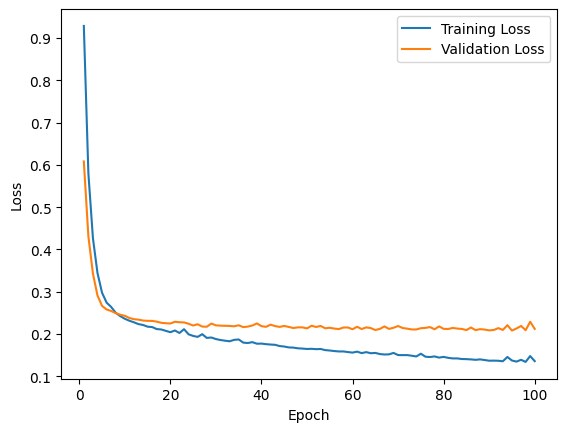

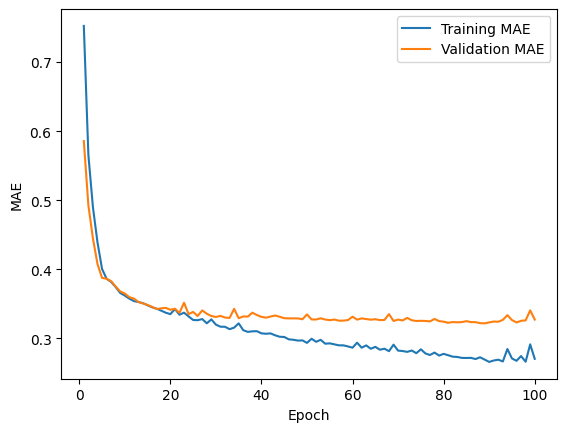

In [26]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['mae'], label='Training MAE')
plt.plot(range(1, num_epochs + 1), history.history['val_mae'], label='Validation MAE')

plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [24]:
y_pred = nn_model.predict(X_test).flatten()  # flatten to convert from shape (n, 1) to (n,)

# 2. Calculate R²
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.8262786808250961


<b> ANALYSIS </b>

Analyzing the hyperparameters for the linear regression model revealed that my base model might be overfitted becasue the R2 score is higher than my best hyeperparameter R2 score. When analyzing the L2 vs L1 hyperparameter tuning it revelaed that there is very little difference between the two. Although my L1 has a better R2 by 0.001. Then doing my neural network I had to play with the learning rate and had to add momentum as a value because my model was having issues with showing 0 loss and 0 MSE. This is most likely due to the complexity of the model since I scaled my features prior to modeling. My neural network had the best R2 by 0.1 and although it had a slightly lower MSE (by 0.01), I believe the neural network worked best for this type of problem. 